# Sales Data Analysis

I have the data of a sales firm which contains their sales data of their products in various cities.
The data also includes OrderId, Price, Quantity..etc

I want to analysis the data inorder to find the following

1. What product sold the most?

2. What was the best month for sales?

3. Which product had highest sales in December?

4. Sales by City representation using a CATPLOT and STRIPPOLOT

5. kde plot to show sales denisty

6. Pair Plot to relationships between sales data

7. Monthly sales using violinplot for all cities

8. Heat map

9. Why some products sold more than others ?


### import libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from matplotlib.font_manager import FontProperties

### read file 

In [26]:
sales_data= pd.read_csv("Sales_Data_All.csv")

### view data

In [27]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### the size of the data

In [28]:
sales_data.shape

(186850, 6)

#### sales data has 18383 records 

### give index a name

In [30]:
sales_data.index.name = "SNo"
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
SNo,,,,,,
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"


### find out the columns to ensure the column names are meaningful

In [31]:
sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

### rename the columns names

In [32]:
sales_data.rename(columns = {"Order ID":"OrderId","Quantity Ordered":"Quantity","Order Date":"Date","Purchase Address":"Address","Price Each":"Price"},inplace=True)
sales_data

,OrderId,Product,Quantity,Price,Date,Address
SNo,,,,,,
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"


## checking null values

In [33]:
sales_data.isna().any(axis=1)

SNo
0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

### drop null values

In [34]:
sales_data=sales_data.dropna(how="all")


In [35]:
sales_data

,OrderId,Product,Quantity,Price,Date,Address
SNo,,,,,,
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"


### checking data type

In [36]:
sales_data.dtypes

OrderId     object
Product     object
Quantity    object
Price       object
Date        object
Address     object
dtype: object

In [37]:
sales_data_types={"OrderId":int,"Product":str,"Quantity":int,"Price":float,"Address":str}
sales_data = sales_data.astype(sales_data_types)

ValueError: invalid literal for int() with base 10: 'Order ID'

#### from the above error we can see that OrderId column has the value as 'Order ID', So we need to remove the
#### those records.

In [38]:
sales_data = sales_data[sales_data["OrderId"]!="Order ID"]
sales_data

,OrderId,Product,Quantity,Price,Date,Address
SNo,,,,,,
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"


In [39]:
sales_data_types={"OrderId":int,"Product":str,"Quantity":int,"Price":float,"Address":str}
sales_data = sales_data.astype(sales_data_types)
sales_data

,OrderId,Product,Quantity,Price,Date,Address
SNo,,,,,,
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"


In [40]:
sales_data.dtypes

OrderId       int64
Product      object
Quantity      int64
Price       float64
Date         object
Address      object
dtype: object

## 1. Which product sold the most?  


In [41]:
sales_data.groupby("Product")[["Quantity"]].sum().sort_values("Quantity",ascending=False)

,Quantity
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


In [42]:
sales_data.groupby("Product")[["Quantity"]].sum().sort_values("Quantity",ascending=False).head(1)

,Quantity
Product,
AAA Batteries (4-pack),31017


### the most sold product is 'AAA Batteries (4-pack)' 

### representing the most sold product  in a bar chart

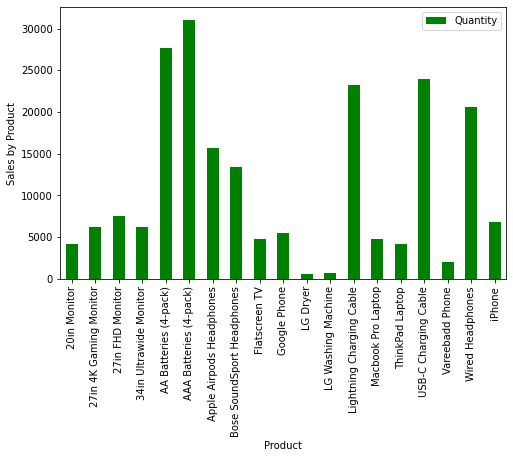

In [43]:
sales_data.groupby("Product")[["Product","Quantity"]].sum().plot.bar(color=["green"],figsize=(8,5))
plt.ylabel("Sales by Product")
plt.show()

#### from the graph it is clear that 'AAA Batteries (4-pack)' has the highest sale


## 2.What was the best month for sales?

### creating a new column for months

In [44]:
sales_data["Month"]=pd.DatetimeIndex(sales_data["Date"]).month
sales_data

,OrderId,Product,Quantity,Price,Date,Address,Month
SNo,,,,,,,
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6


### creating sales column

In [46]:
sales_data["Sales"]=sales_data["Quantity"]*sales_data["Price"]
sales_data

,OrderId,Product,Quantity,Price,Date,Address,Month,Sales
SNo,,,,,,,,
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95


In [47]:
sales_data.groupby("Month")[["Sales"]].sum().sort_values("Sales",ascending=False).head(1)

,Sales
Month,
12,4.613443e+06


### December had the best sales.

### representing the best month for sale in a pie chart

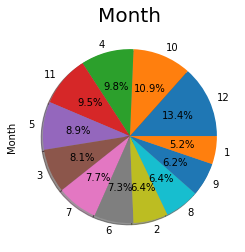

In [48]:
plt.title("Month",fontsize=20)
sales_data["Month"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True)
plt.show()

####  from the above graph it is clear that 12th month has the highest sale.

## 3.Which product had highest sales in December?

In [49]:
sales_data[sales_data["Month"]==12].groupby("Product")[["Sales"]].sum().sort_values("Sales",ascending=False).head(1)


,Sales
Product,
Macbook Pro Laptop,1093100.0


### Macbook Pro Laptop had highest sales in December

### representing the highest sales in december in a bar chart

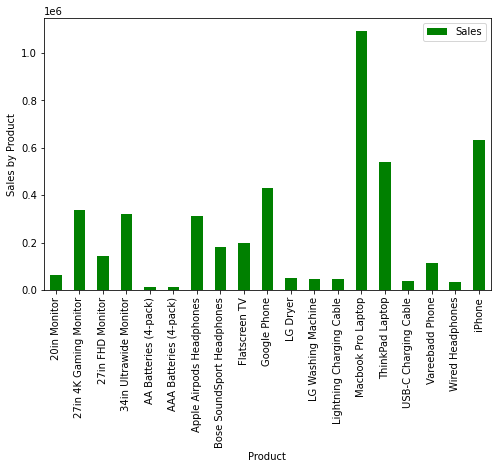

In [50]:
sales_data[sales_data["Month"]==12].groupby("Product")[["Sales"]].sum().plot.bar(color=["green"],figsize=(8,5))
plt.ylabel("Sales by Product")
plt.show()



## 4. Sales by City representation using a CATPLOT and STRIPPOLOT

In [51]:
sales_data


,OrderId,Product,Quantity,Price,Date,Address,Month,Sales
SNo,,,,,,,,
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95


### creating a new column for city from Address

In [52]:
sales_data =pd.concat([sales_data, sales_data["Address"].str.split(', ', expand=True)], axis=1)
sales_data

,OrderId,Product,Quantity,Price,Date,Address,Month,Sales,0,1,2
SNo,,,,,,,,,,,
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,136 Church St,New York City,NY 10001
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,562 2nd St,New York City,NY 10001
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,277 Main St,New York City,NY 10001
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,410 6th St,San Francisco,CA 94016
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,43 Hill St,Atlanta,GA 30301
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,795 Pine St,Boston,MA 02215
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,495 North St,New York City,NY 10001
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,319 Ridge St,San Francisco,CA 94016


In [53]:
sales_data.rename(columns={1:"City"},inplace=True)
sales_data



,OrderId,Product,Quantity,Price,Date,Address,Month,Sales,0,City,2
SNo,,,,,,,,,,,
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,136 Church St,New York City,NY 10001
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,562 2nd St,New York City,NY 10001
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,277 Main St,New York City,NY 10001
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,410 6th St,San Francisco,CA 94016
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,43 Hill St,Atlanta,GA 30301
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,795 Pine St,Boston,MA 02215
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,495 North St,New York City,NY 10001
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,319 Ridge St,San Francisco,CA 94016


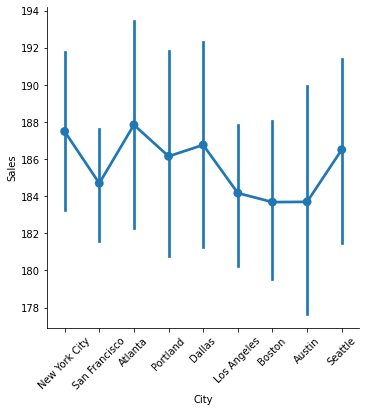

In [63]:
sns.catplot(x="City",y="Sales",kind="point",data=sales_data)
plt.xticks(rotation=45)
plt.show()

In [65]:
sales_data.groupby("City")[["Sales"]].sum().sort_values("Sales",ascending=False)

,Sales
City,
San Francisco,8.262204e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Boston,3.661642e+06
Atlanta,2.795499e+06
Dallas,2.767975e+06
Seattle,2.747755e+06
Portland,2.320491e+06
Austin,1.819582e+06


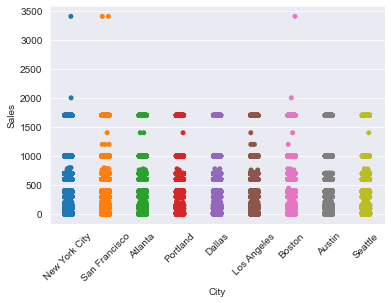

In [79]:
sns.set_style("darkgrid")
sns.stripplot(x="City",y="Sales",data=sales_data)
plt.xticks(rotation=45)
plt.show()

### 5. kde plot to show sales denisty

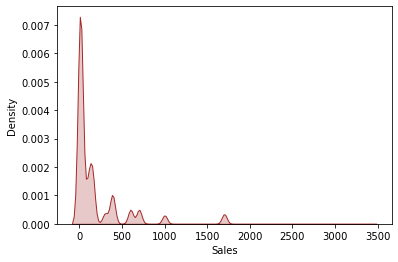

In [72]:
sns.kdeplot(sales_data["Sales"],color="brown",shade=True)
plt.show()

### 6. Pair Plot to relationships between sales data

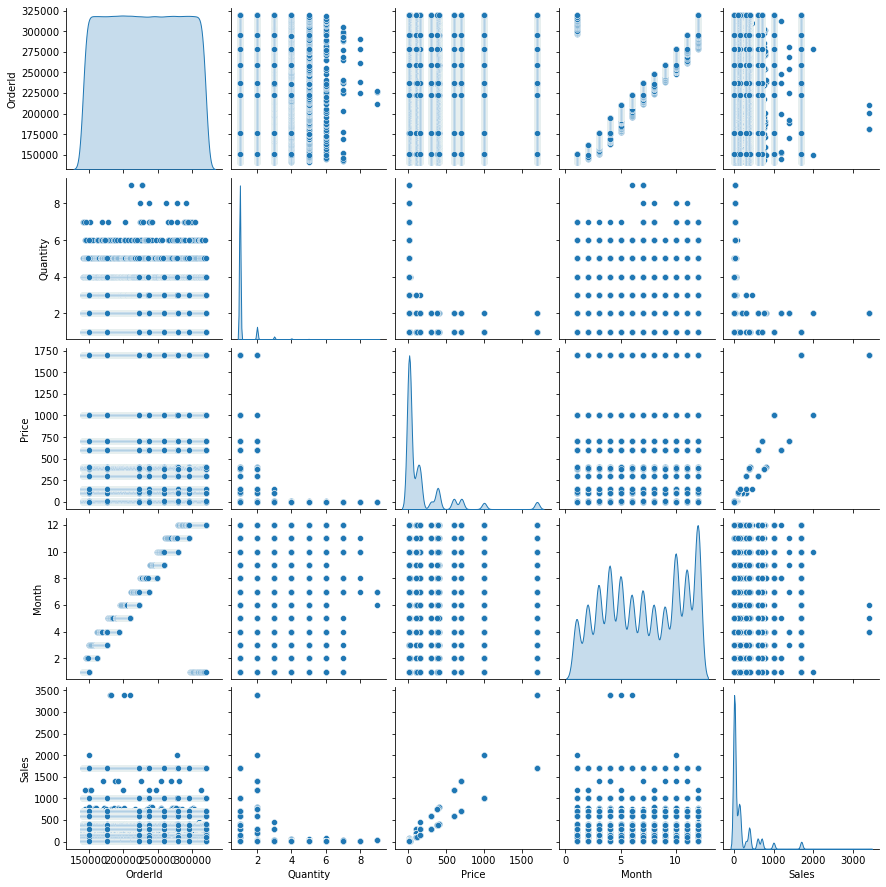

In [74]:
sns.pairplot(sales_data, diag_kind="kde")
plt.show()

### 7. Monthly sales using violinplot

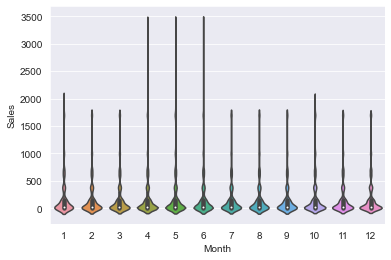

In [81]:
sns.violinplot(x="Month",y="Sales",data=sales_data)
plt.show()

### 8. Heat map 

In [98]:
sales_data.corr

<bound method DataFrame.corr of         OrderId                 Product  Quantity    Price            Date  \
SNo                                                                          
0        295665      Macbook Pro Laptop         1  1700.00  12/30/19 00:01   
1        295666      LG Washing Machine         1   600.00  12/29/19 07:03   
2        295667    USB-C Charging Cable         1    11.95  12/12/19 18:21   
3        295668        27in FHD Monitor         1   149.99  12/22/19 15:13   
4        295669    USB-C Charging Cable         1    11.95  12/18/19 12:38   
...         ...                     ...       ...      ...             ...   
186845   222905  AAA Batteries (4-pack)         1     2.99  06/07/19 19:02   
186846   222906        27in FHD Monitor         1   149.99  06/01/19 19:29   
186847   222907    USB-C Charging Cable         1    11.95  06/22/19 18:57   
186848   222908    USB-C Charging Cable         1    11.95  06/26/19 18:35   
186849   222909  AAA Batteries (

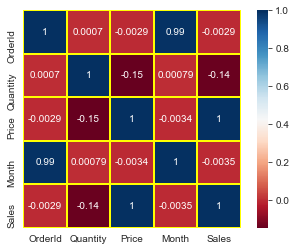

In [107]:
sns.heatmap(sales_data.corr(),cmap="RdBu",linewidth=1,annot=True,linecolor="yellow",square=True)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Segment wise sales in each Country")
sns.barplot(x="Country",y="Sales",data=sales_data,hue="Segment",
            order=sales_data["Country"].value_counts().index,palette="coolwarm_r")
plt.xlabel("Country",fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(22,9))
sns.countplot(x="Profit",data=sales_data,palette="rocket_r",order=sales_data["Profit"].value_counts().index)
plt.xlabel("Profit",fontsize=25)
plt.xticks(rotation=70)
plt.show()


### 9. Why some products sold more than others ?

From our analysis # 1, we found that AAA Batteries (4-pack) sold more quanity.
Why this trend ?
To anlaysis furhter,  let's take the top 5 products that had sold highest quanity and try to find some pattern

In [112]:
sales_data.groupby("Product")[["Quantity"]].sum().sort_values("Quantity",ascending=False).head(5)

,Quantity
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557


In [121]:
sales_data[sales_data["Product"].isin(["AAA Batteries (4-pack)","AA Batteries (4-pack)","USB-C Charging Cable","Lightning Charging Cable","Wired Headphones"])]


,OrderId,Product,Quantity,Price,Date,Address,Month,Sales,0,City,2
SNo,,,,,,,,,,,
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,277 Main St,New York City,NY 10001
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,43 Hill St,Atlanta,GA 30301
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84,200 Jefferson St,New York City,NY 10001
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12,11.95,928 12th St,Portland,OR 97035
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90,813 Hickory St,Dallas,TX 75001
...,...,...,...,...,...,...,...,...,...,...,...
186843,222903,Lightning Charging Cable,1,14.95,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",6,14.95,685 Hickory St,New York City,NY 10001
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,795 Pine St,Boston,MA 02215
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,319 Ridge St,San Francisco,CA 94016


From the above records, we can see that, the price of the top 5 highest sold product is lower than others. Hence, we can assume that, the cheaper items are sold more comparing to expensive products..

This is an hypothesis statement, to prove it, let's use same bar graph, but this time, we will overlay the price

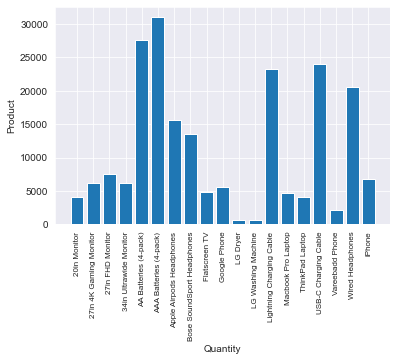

In [122]:
product_group = sales_data.groupby("Product")
quantities = product_group.sum()["Quantity"]
products = [product for product, df in product_group]

plt.bar(products,quantities)
plt.xlabel("Quantity")
plt.ylabel("Product")
plt.xticks(rotation="vertical",size=8)
plt.show()

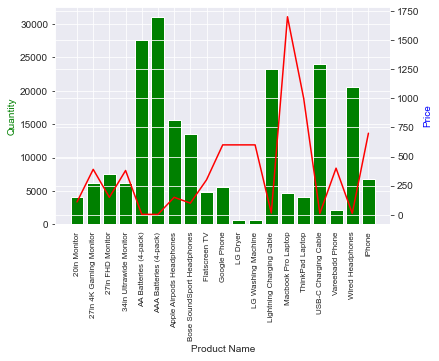

In [123]:
prices = product_group.mean()["Price"]

fig,ax1=plt.subplots()

ax2=ax1.twinx()

ax1.bar(products,quantities,color="green")
ax2.plot(products,prices,color="red")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity",color="green")
ax2.set_ylabel("Price",color="blue")
ax1.set_xticklabels(products,rotation="vertical",size=8)
plt.show()

#### From the above graph, we can see that, the red line (price) go down, the green bar (sales) go high

## CONCLUSION

1. What product sold the most?
   #### AAA Batteries (4-pack)     


2. What was the best month for sales?
    #### December
    
    
3. Which product had highest sales in December?
    #### MacBook Pro



#### Finally: We found that, cheaper product moves fast, although the total sales may not be in same propotion
